## Practical Activity 2.3.5

### 1. Prepare your workstation

In [10]:
# Import all the necessary packages.
import numpy as np
import pandas as pd

import warnings  
warnings.filterwarnings("ignore")

In [11]:
# Import data file.
df_ais = pd.read_csv('ais.csv')

df_ais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  202 non-null    float64
 8   lbm     202 non-null    float64
 9   ht      202 non-null    float64
 10  wt      202 non-null    float64
 11  sex     202 non-null    object 
 12  sport   202 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [12]:
# Determine null values.
df_ais.isnull().sum()

rcc       0
wcc       0
hc        0
hg        0
ferr      0
bmi       0
ssf       0
pcBfat    0
lbm       0
ht        0
wt        0
sex       0
sport     0
dtype: int64

### 2. Evaluate the variables

In [13]:
# Descriptive analysis.
df_ais.describe()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108911,43.091584,14.566337,76.876238,22.955891,69.021782,13.507426,64.873713,180.103960,75.007921
std,0.457976,1.800337,3.662989,1.362451,47.501239,2.863933,32.565333,6.189826,13.070197,9.734494,13.925199
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,5.630000,34.360000,148.900000,37.800000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,8.545000,54.667500,174.000000,66.525000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,11.650000,63.035000,179.700000,74.400000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,18.080000,74.750000,186.175000,84.125000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,35.520000,106.000000,209.400000,123.200000


### 3. Drop unneeded columns

In [14]:
# Drop unneedd columns.
# Quick analysis on the variable.
print(len(df_ais['sex'].unique()))
print(len(df_ais['sport'].unique()))

# In cluster analysis we cannot use unique identifier so we drop this column.
df_ais.drop('sex', axis = 1, inplace = True)

2
10


In [15]:
# Display the column names.
df_ais.columns

Index(['rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat', 'lbm', 'ht',
       'wt', 'sport'],
      dtype='object')

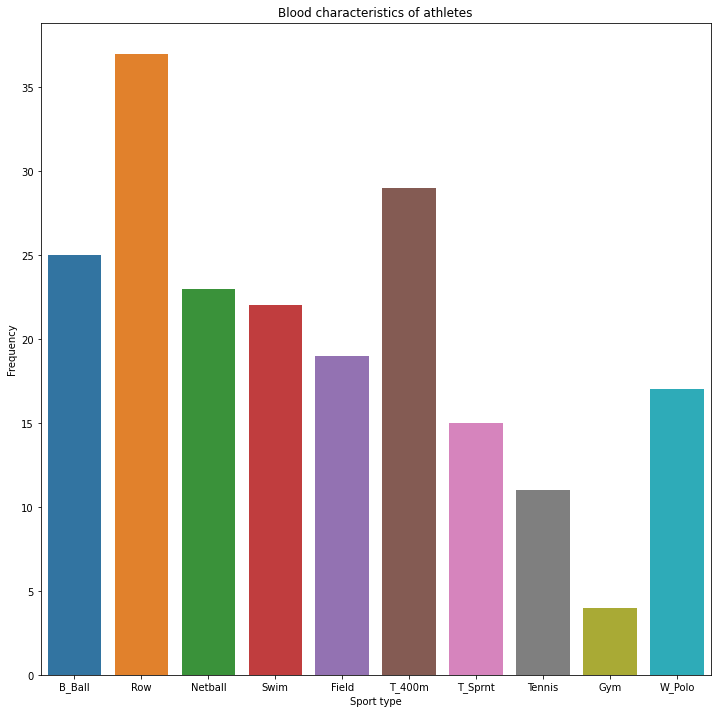

In [16]:
# Plot a countplot to display the frequency per sport type.
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize = (12, 12))
ax = sns.countplot(x = "sport", data = df_ais)
plt.title('Blood characteristics of athletes')
plt.xlabel('Sport type')
plt.ylabel('Frequency')

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),
                (p.get_x() + 0.1, p.get_height() + 50),
                va = 'center')

### 4. Specify the target variable 

In [17]:
# Define the target variables.
X = df_ais
y = df_ais['sport']

# Import the LabelEncoder class:
from sklearn.preprocessing import LabelEncoder

# Convert the target variable to integers.
le = LabelEncoder()

# Replace in the existing DataFrame with the integer values.
X['sport'] = le.fit_transform(X['sport'])
y = le.transform(y)

In [19]:
# View the modified DataFrame.
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  202 non-null    float64
 8   lbm     202 non-null    float64
 9   ht      202 non-null    float64
 10  wt      202 non-null    float64
 11  sport   202 non-null    int32  
dtypes: float64(10), int32(1), int64(1)
memory usage: 18.3 KB


In [20]:
X.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sport
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,0
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,0
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,0
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,0
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,0


### 5. Normalise the data set

In [21]:
# Create an list with the column labels from X:
x_cols = X.columns

# Import the MinMaxScaler class.
from sklearn.preprocessing import MinMaxScaler 

# Create the object from ‘MinMaxScaler’.
ms = MinMaxScaler() 
# Modify X to scale values between 0 and 1.
X = ms.fit_transform(X) 
# Set X as equal to a new DataFrame.
X = pd.DataFrame(X, columns=[x_cols]) 

# Check the contents of the modified DataFrame.
X.head() 

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sport
0,0.054795,0.381818,0.067227,0.092105,0.230088,0.215620,0.469329,0.472399,0.404243,0.776860,0.481265,0.0
1,0.208904,0.454545,0.096639,0.144737,0.265487,0.221845,0.432870,0.524256,0.337661,0.674380,0.428571,0.0
2,0.116438,0.154545,0.021008,0.000000,0.057522,0.289191,0.443287,0.476748,0.293132,0.477686,0.366511,0.0
3,0.106164,0.181818,0.058824,0.131579,0.269912,0.290323,0.569444,0.603212,0.318537,0.596694,0.434426,0.0
4,0.222603,0.318182,0.235294,0.315789,0.092920,0.125071,0.302662,0.401807,0.262982,0.590083,0.313817,0.0


### 6. Apply the clustering algorithm

In [22]:
# Import KMeans class.
from sklearn.cluster import KMeans

# Apply the clustering and fit() method.
kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [23]:
# Indicate 'kmeans()' applies to 'cluster_centers'.
kmeans.cluster_centers_

array([[0.42330123, 0.36165617, 0.41222231, 0.52305888, 0.39003768,
        0.40787933, 0.13691213, 0.12203161, 0.56624984, 0.60837902,
        0.5274538 , 0.55335534],
       [0.20588634, 0.33087309, 0.19211249, 0.25755602, 0.21948655,
        0.29454185, 0.33787702, 0.40506279, 0.28561261, 0.42315686,
        0.34392608, 0.40814081]])

In [24]:
# Check the inertia for the data set.
kmeans.inertia_

61.641144942711435

### 7. Evaluate the output

In [25]:
# Extract the labels from the k-means.
labels = kmeans.labels_

# Check correctly labelled instances.
correct_labels = sum(y == labels)

# Print the output.
print('Result: %d out of %d samples were correctly labelled.' % (correct_labels,
                                                                y.size))

Result: 19 out of 202 samples were correctly labelled.


### 8. Improve the accuracy (elbow method)

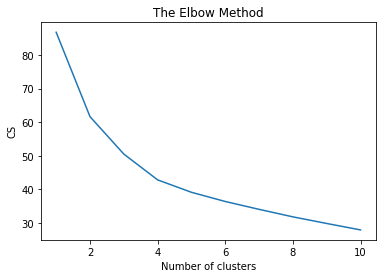

In [29]:
# Create an empty list.
cs = []

# Employ a loop to test cluster sizes:
for i in range(1, 11):
    # Create object k-means.
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 100,
                   random_state = 0)
    # Apply the fit() method.
    kmeans.fit(X)
    # Add the inertia value.
    cs.append(kmeans.inertia_)

# Create a plot.
plt.plot(range(1, 11), cs)
# Speciy the title, x-axis label and y-axis label.
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')

# Display the plot.
plt.show()

# From the elbow method we can check the optimal number from 3 - 6.

In [40]:
# Create a k-means object with six clusters:
kmeans = KMeans(n_clusters = 6, random_state = 0)

# Apply 'fit()', using the DataFrame, to the k-means object.
kmeans.fit(X)

# Check how many of the samples were corectly labelled:
labels = kmeans.labels_
correct_labels = sum(y == labels)

# Display the accuracy score:
print('Result: %d out of %d samples were correctly labelled.' % (correct_labels,
                                                                y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels / float(y.size)))

Result: 31 out of 202 samples were correctly labelled.
Accuracy score: 0.15


### 9. Visualise the clusters

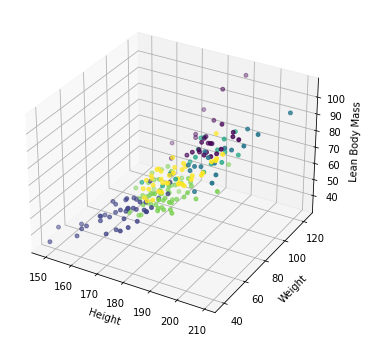

In [43]:
# Create the figure area.
fig = plt.figure(figsize = (26, 6))

# Create a 3D projection area.
ax = fig.add_subplot(131, projection = '3d')

# Create a 3D scatter plot and specify the data source for each axis:
ax.scatter(df_ais['ht'], df_ais['wt'], df_ais['lbm'],
          c = labels, s = 15)

# [4] Set the label for each dimension:
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Lean Body Mass')

# [5] Show the plot.
plt.show()

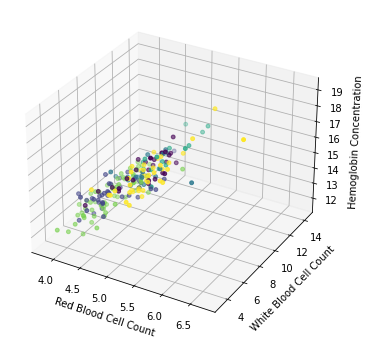

In [44]:
# Create the figure area.
fig = plt.figure(figsize = (26, 6))

# Create a 3D projection area.
ax = fig.add_subplot(131, projection = '3d')

# Create a 3D scatter plot and specify the data source for each axis:
ax.scatter(df_ais['rcc'], df_ais['wcc'], df_ais['hg'],
          c = labels, s = 15)

# [4] Set the label for each dimension:
ax.set_xlabel('Red Blood Cell Count')
ax.set_ylabel('White Blood Cell Count')
ax.set_zlabel('Hemoglobin Concentration')

# [5] Show the plot.
plt.show()

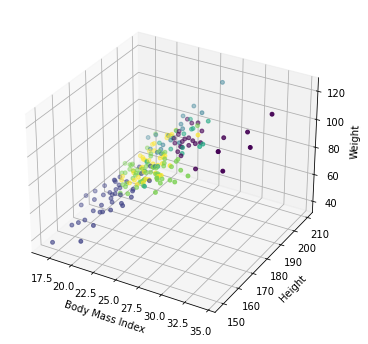

In [45]:
# Create the figure area.
fig = plt.figure(figsize = (26, 6))

# Create a 3D projection area.
ax = fig.add_subplot(131, projection = '3d')

# Create a 3D scatter plot and specify the data source for each axis:
ax.scatter(df_ais['bmi'], df_ais['ht'], df_ais['wt'],
          c = labels, s = 15)

# [4] Set the label for each dimension:
ax.set_xlabel('Body Mass Index')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')

# [5] Show the plot.
plt.show()